# FFTLog examples

Theoretical sine and cosine transform pairs.

Reference: P. Yip, Sine and Cosine Transforms, in Transforms and Applications Handbook, Second Edition, 2000, Ed. Alexander D. Poularikas.
<https://www.crcpress.com/The-Transforms-and-Applications-Handbook-Second-Edition/Poularikas/p/book/9780849385957>

**Note:**
The transform-pairs are slightly different defined in the above reference than in FFTLog. The frequency-statements have therefore to be divided by $\sqrt{\pi/2}$.

### Imports, plot settings

In [1]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt

# I import fftpack after compiling just the fftpack within scipy:
# /path/to/scipy/scipy/fftpack> python setup.py install
import fftpack

# Style adjustments
%matplotlib inline
plt.style.use('ggplot')
rcParams['text.usetex'] = True
rcParams['font.serif'] = 'Computer Modern Roman'
rcParams['font.family'] = 'serif'
rcParams['font.style'] = 'normal'

### Plot function

In [2]:
def printfig(w, fw, t, ft, fftl, title, direction=1):
    fig = plt.figure(figsize=(10,8))
    plt.subplots_adjust(wspace=.3, hspace=.3)
    plt.suptitle(title, y=1.01, fontsize=18)

    # Plot theoretical frequency domain curve
    plt.subplot(221)
    plt.title(r'Frequency domain')
    plt.xlabel('Angular frequency $\omega$ (Hz)')
    plt.ylabel(r'Amplitude')
    plt.semilogx(w, fw, 'k-')
    if direction == -1:
        plt.plot(w, fftl, 'r-', label='FFTLog')
    plt.xlim([w.min(), w.max()])

    # Plot theoretical time domain curve and result from FFTLog
    plt.subplot(222)
    plt.title(r'Time domain')
    plt.xlabel('Time $t$ (s)')
    plt.ylabel(r'Amplitude')
    plt.loglog(t, ft, 'k-', label='Analytical')
    if direction == 1:
        plt.plot(t, fftl, 'r-', label='FFTLog')
    plt.xlim([t.min(), t.max()])
    plt.legend(loc='best')

    # Plot the absolute error
    plt.subplot(223)
    plt.title('Absolute error')
    plt.ylabel('Absolute error')
    if direction == 1:
        plt.xlabel('Time $t$ (s)')
        plt.loglog(t, abs(fftl-ft), 'r-')
        plt.xlim([t.min(), t.max()])
    else:
        plt.xlabel('Angular frequency $\omega$ (Hz)')
        plt.loglog(t, abs(fftl-fw), 'r-')
        plt.xlim([w.min(), w.max()])

    # Plot the relative error
    plt.subplot(224)
    plt.title('Relative error')
    plt.ylabel('Relative error (-)')
    if direction == 1:
        plt.xlabel('Time $t$ (s)')
        plt.loglog(t, abs(fftl-ft)/ft, 'r-')
        plt.xlim([t.min(), t.max()])
    else:
        plt.xlabel('Angular frequency $\omega$ (Hz)')
        plt.loglog(t, abs(fftl-fw)/fw, 'r-')
        plt.xlim([w.min(), w.max()])

    plt.show()

# Sine examples

## (1) $\qquad \sqrt{\frac{\pi}{8}}\exp(-\omega)\sin(\omega) \Longleftrightarrow \frac{t}{4 + t^4}$

True


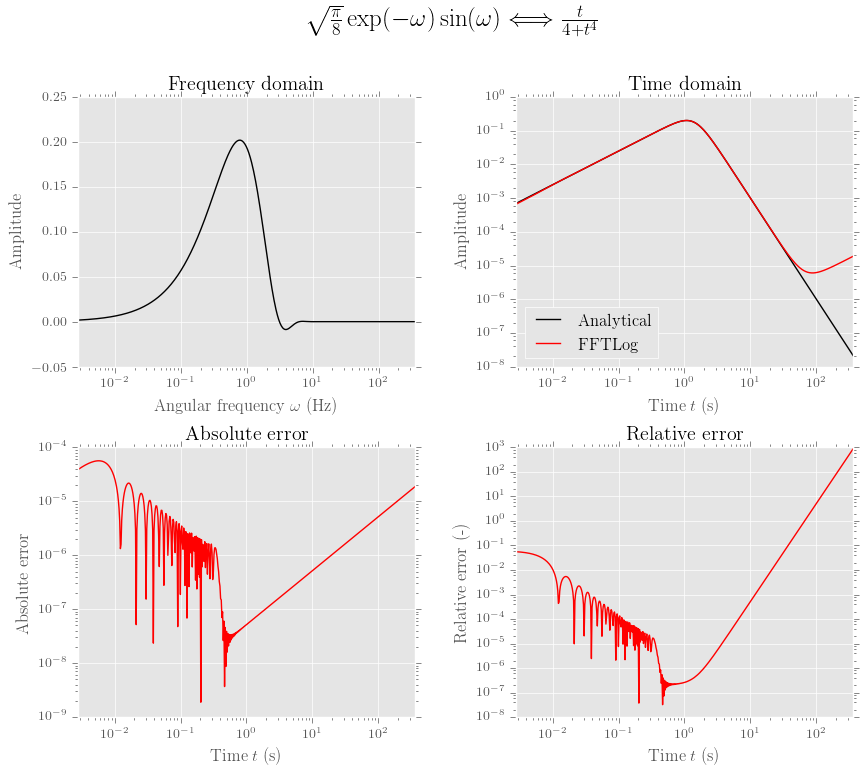

In [3]:
# FFTLog parameters
n, dlogr, logrc = 512, .01, 0
q = -.2
mu = 'sine'
w, t, kr, rk = fftpack.fftlogargs(n, dlogr, logrc, mu=mu, q=q, kr=1, kropt=1)

# Analytical solution
fw = np.sqrt(np.pi/2)/2*np.exp(-w)*np.sin(w)  # Frequency domain
ft = t/(4 + t**4)                             # Time domain
title = r'$\sqrt{\frac{\pi}{8}}\exp(-\omega)\sin(\omega) \Longleftrightarrow \frac{t}{4 + t^4}$'

# FFTLog
fftl = fftpack.fftlog(fw, dlogr=dlogr, mu=mu, q=q, kr=kr, rk=rk)

print(np.all(np.isclose(fftl[120:-150], ft[120:-150], rtol=1e-3)))

# Print result
printfig(w, fw, t, ft, fftl, title)

## (2) $\qquad \sqrt{\frac{\pi}{2}}\exp(-a\omega) \Longleftrightarrow \frac{t}{t^2 + a^2}; \quad a=2$

True


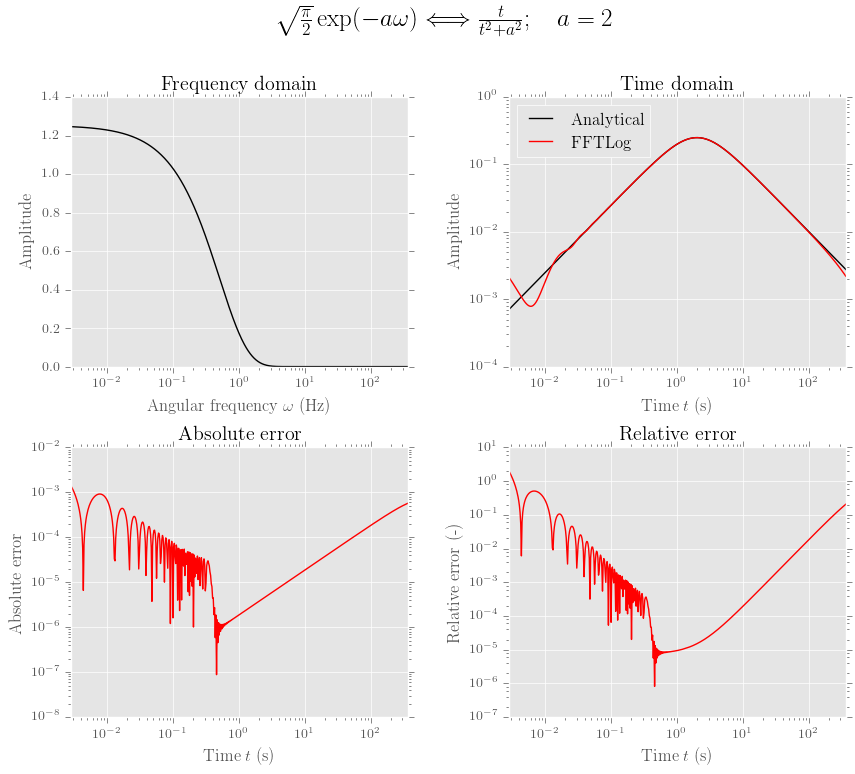

In [4]:
# FFTLog parameters
n, dlogr, logrc = 512, .01, 0
q = -0.5
mu = 'sine'
w, t, kr, rk = fftpack.fftlogargs(n, dlogr, logrc, mu=mu, q=q, kr=1, kropt=1)

# Analytical solution
a=2
fw = np.sqrt(np.pi/2)*np.exp(-a*w)  # Frequency domain
ft = t/(t**2+a**2)         # Time domain
title = r'$\sqrt{\frac{\pi}{2}}\exp(-a\omega) \Longleftrightarrow \frac{t}{t^2 + a^2}; \quad a=2$'

# FFTLog
fftl = fftpack.fftlog(fw, dlogr=dlogr, mu=mu, q=q, kr=kr, rk=rk)

print(np.all(np.isclose(fftl[180:-120], ft[180:-120], rtol=1e-3, atol=1e-6)))

# Print result
printfig(w, fw, t, ft, fftl, title)

## (3) $\qquad \frac{1}{\sqrt{\omega}} \Longleftrightarrow \frac{1}{\sqrt{t}}$

True


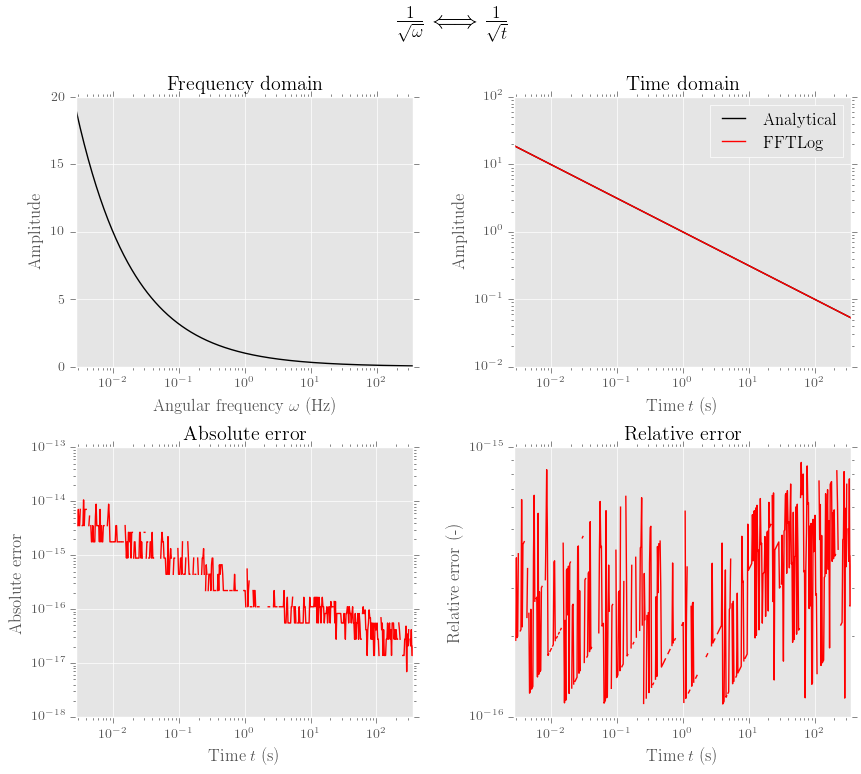

In [5]:
# FFTLog parameters
n, dlogr, logrc = 512, .01, 0
q = 0
mu = 'sine'
w, t, kr, rk = fftpack.fftlogargs(n, dlogr, logrc, mu=mu, q=q, kr=1, kropt=1)

# Analytical solution
fw = np.sqrt(1/w)  # Frequency domain
ft = 1/np.sqrt(t)  # Time domain
title = r'$\frac{1}{\sqrt{\omega}} \Longleftrightarrow \frac{1}{\sqrt{t}}$'

# FFTLog
fftl = fftpack.fftlog(fw, dlogr=dlogr, mu=mu, q=q, kr=kr, rk=rk)

print(np.all(np.isclose(fftl, ft)))

# Print result
printfig(w, fw, t, ft, fftl, title)

## (4) $\qquad \sqrt{\frac{\pi}{2}} \Longleftrightarrow \frac{1}{t}$

True


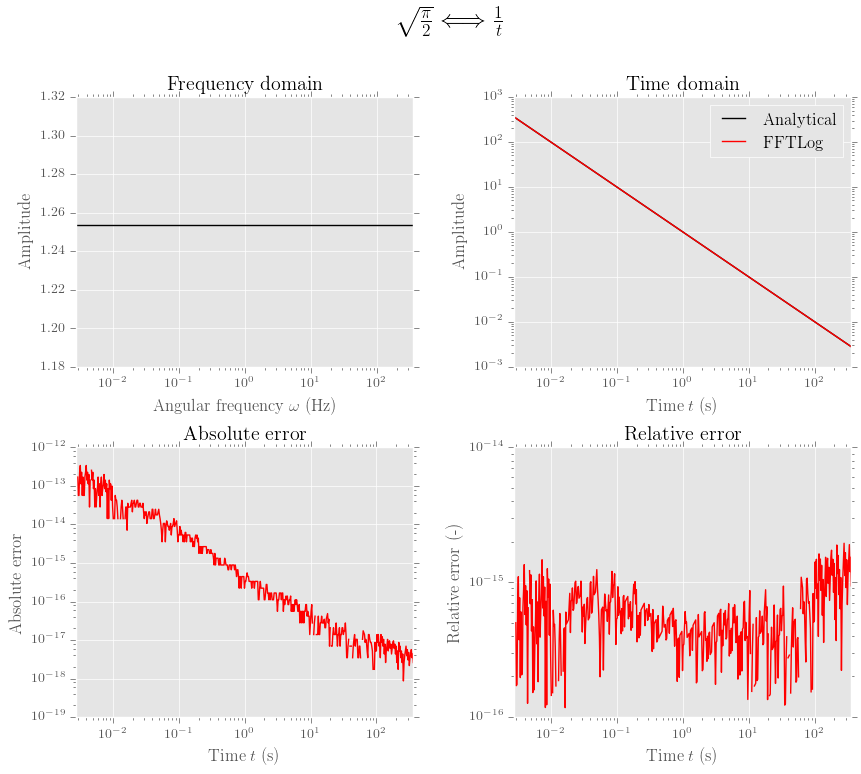

In [6]:
# FFTLog parameters
n, dlogr, logrc = 512, .01, 0
q = 0.5
mu = 'sine'
w, t, kr, rk = fftpack.fftlogargs(n, dlogr, logrc, mu=mu, q=q, kr=1, kropt=1)

# Analytical solution
fw = np.sqrt(np.pi/(2*np.ones(w.size)))  # Frequency domain
ft = 1/t                                 # Time domain
title = r'$\sqrt{\frac{\pi}{2}} \Longleftrightarrow \frac{1}{t}$'

# FFTLog
fftl = fftpack.fftlog(fw, dlogr=dlogr, mu=mu, q=q, kr=kr, rk=rk)

print(np.all(np.isclose(fftl, ft)))

# Print result
printfig(w, fw, t, ft, fftl, title)

## (5) $\qquad \sqrt{\frac{2}{\pi}}\frac{\omega}{1 + \omega^2} \Longleftrightarrow \exp{-t}$

True


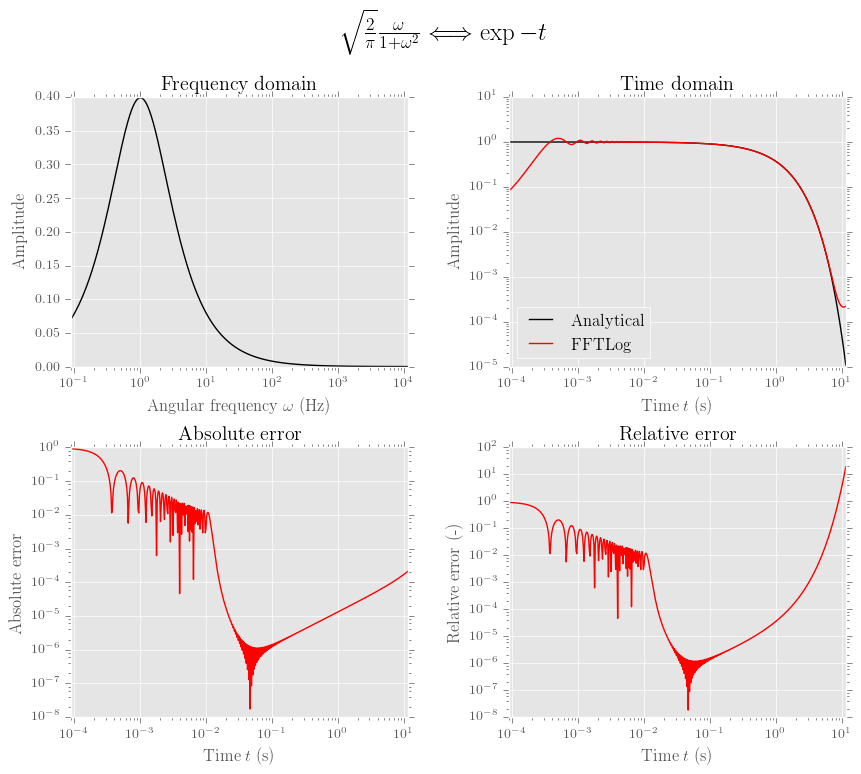

In [7]:
# FFTLog parameters
n, dlogr, logrc = 512, .01, 1.5
q = 0
mu = 'sine'
w, t, kr, rk = fftpack.fftlogargs(n, dlogr, logrc, mu=mu, q=q, kr=1, kropt=1)

# Analytical solution
fw = np.sqrt(2/np.pi)*w/(1 + w**2)  # Frequency domain
ft = np.exp(-t)                                 # Time domain
title = r'$\sqrt{\frac{2}{\pi}}\frac{\omega}{1 + \omega^2} \Longleftrightarrow \exp{-t}$'

# FFTLog
fftl = fftpack.fftlog(fw, dlogr=dlogr, mu=mu, q=q, kr=kr, rk=rk)

print(np.all(np.isclose(fftl[220:-60], ft[220:-60], rtol=1e-3, atol=1e-6)))

# Print result
printfig(w, fw, t, ft, fftl, title)

# Cosine examples

## (1) $\qquad \frac{1}{\sqrt{\omega}} \Longleftrightarrow \frac{1}{\sqrt{t}}$

True


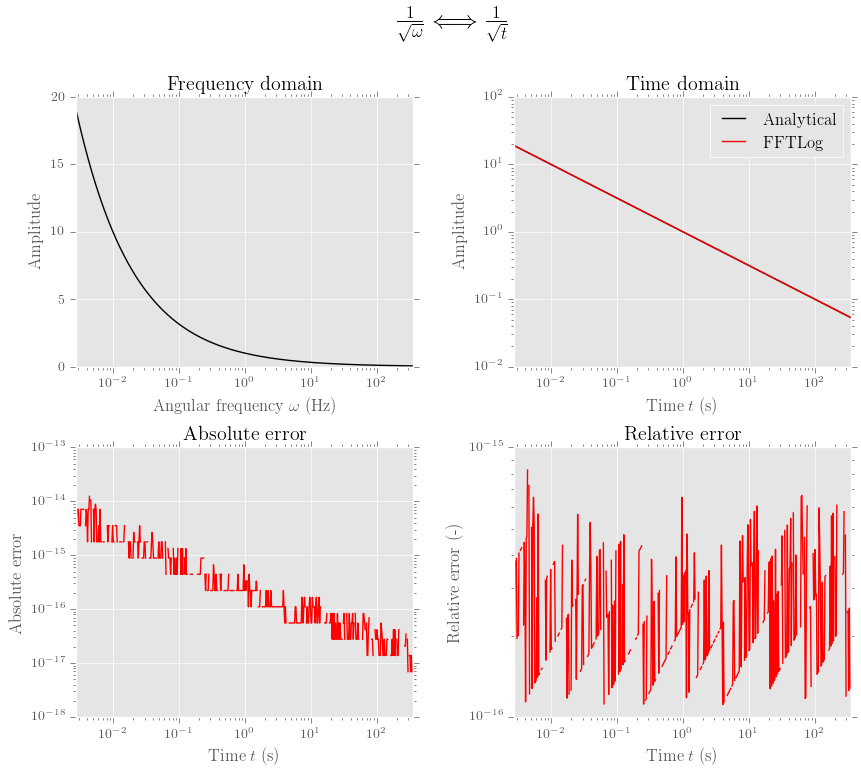

In [8]:
# FFTLog parameters
n, dlogr, logrc = 512, .01, 0
q = 0
mu = 'cosine'
w, t, kr, rk = fftpack.fftlogargs(n, dlogr, logrc, mu=mu, q=q, kr=1, kropt=1)

# Analytical solution
fw = np.sqrt(1/w)  # Frequency domain
ft = 1/np.sqrt(t)  # Time domain
title = r'$\frac{1}{\sqrt{\omega}} \Longleftrightarrow \frac{1}{\sqrt{t}}$'

# FFTLog
fftl = fftpack.fftlog(fw, dlogr=dlogr, mu=mu, q=q, kr=kr, rk=rk)

print(np.all(np.isclose(fftl, ft)))

# Print result
printfig(w, fw, t, ft, fftl, title)